#Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
pip install scikit-learn

In [ ]:
df = pd.read_csv("nilaiIF.csv")
# To display the top 5 rows
df.head(10)

<ipython-input-3-ea2cc984aae5>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nilaiIF.csv")


,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf
0,NIM,MUHAMAD AZHAR,20051,KP8700,2.0,Kerja Praktek,20122,NaN
1,NIM,MUHAMAD AZHAR,20051,KM8800,1.0,Komprehensif,20122,NaN
2,NIM,MUHAMAD AZHAR,20051,TA8800,4.0,Tugas AkhirSkripsi,20122,NaN
3,NIM,ABDUL HANAN,20061,705101,2.0,AlQuran Dan Ilmu Tafsir,20061,A
4,NIM,ABDUL HANAN,20061,705104,2.0,Bahasa Arab I,20061,A
5,NIM,ABDUL HANAN,20061,705102,2.0,Bahasa Indonesia,20061,B
6,NIM,ABDUL HANAN,20061,705103,2.0,Bahasa Inggris,20061,B
7,NIM,ABDUL HANAN,20061,705106,3.0,Fisika Dasar,20061,C
8,NIM,ABDUL HANAN,20061,705105,3.0,Kalkulus I,20061,D
9,NIM,ABDUL HANAN,20061,705108,3.0,Kimia Dasar,20061,C


In [ ]:
# Mengubah variable Angkatan dan Periode Semester
df['Angkatan'] = df['Angkatan'].astype(str).str[:-1]  # Menghapus satu angka terakhir
df['Periode Semester'] = df['Periode Semester'].astype(str).str[:-1]  # Menghapus satu angka terakhir

# Membuat mapping dari nilai huruf ke skor numerik
mapping_nilai = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}

# Mengonversi kolom 'Nilai Huruf' ke skala numerik
df['Nilai Numerik'] = df['Nilai Huruf'].map(mapping_nilai)

# Menampilkan hasil
print(df)

               NIM             Nama Angkatan            Kode MK  SKS  \
0              NIM    MUHAMAD AZHAR     2005             KP8700  2.0   
1              NIM    MUHAMAD AZHAR     2005             KM8800  1.0   
2              NIM    MUHAMAD AZHAR     2005             TA8800  4.0   
3              NIM      ABDUL HANAN     2006             705101  2.0   
4              NIM      ABDUL HANAN     2006             705104  2.0   
...            ...              ...      ...                ...  ...   
192031  1237050151  OMAR HASSAN NOR     2023  201004-705-02-013  2.0   
192032  1237050151  OMAR HASSAN NOR     2023  201004-705-02-014  1.0   
192033  1237050151  OMAR HASSAN NOR     2023  201004-705-03-001  2.0   
192034  1237050151  OMAR HASSAN NOR     2023  201004-705-03-011  NaN   
192035  1237050151  OMAR HASSAN NOR     2023  201004-705-02-002  1.0   

               Nama Mata Kuliah Periode Semester Nilai Huruf  Nilai Numerik  
0                 Kerja Praktek             2012         

In [ ]:
# Mengganti nilai NaN pada kolom dengan nilai 0
df['SKS'] = df['SKS'].fillna(0)
df['Nilai Numerik'] = df['Nilai Numerik'].fillna(0)
df['Nilai Huruf'] = df['Nilai Huruf'].fillna(0)
df.head()

,NIM,Nama,Angkatan,Kode MK,SKS,Nama Mata Kuliah,Periode Semester,Nilai Huruf,Nilai Numerik
0,NIM,MUHAMAD AZHAR,2005,KP8700,2.0,Kerja Praktek,2012,0,0.0
1,NIM,MUHAMAD AZHAR,2005,KM8800,1.0,Komprehensif,2012,0,0.0
2,NIM,MUHAMAD AZHAR,2005,TA8800,4.0,Tugas AkhirSkripsi,2012,0,0.0
3,NIM,ABDUL HANAN,2006,705101,2.0,AlQuran Dan Ilmu Tafsir,2006,A,4.0
4,NIM,ABDUL HANAN,2006,705104,2.0,Bahasa Arab I,2006,A,4.0


In [ ]:
df = df.rename(columns={
    'Kode MK': 'Kode_MK',
    'Periode Semester': 'Periode_Semester',
    'Nilai Huruf': 'Nilai_Huruf',
    'Nilai Numerik': 'Nilai_Numerik',
    'Total Semester': 'Total_Semester',
    'Status Lulus': 'Status_Lulus',
    'Nama Mata Kuliah': 'Mata_Kuliah'
})

In [ ]:
# Mengonversi kolom 'Kolom_A' dan 'Kolom_B' menjadi tipe data numerik
df['Angkatan'] = pd.to_numeric(df['Angkatan'])
df['Periode_Semester'] = pd.to_numeric(df['Periode_Semester'])
df.loc[:, 'Lama_Studi_(Tahun)'] = df['Periode_Semester'] - df['Angkatan']


print(df)

               NIM             Nama  Angkatan            Kode_MK  SKS  \
0              NIM    MUHAMAD AZHAR      2005             KP8700  2.0   
1              NIM    MUHAMAD AZHAR      2005             KM8800  1.0   
2              NIM    MUHAMAD AZHAR      2005             TA8800  4.0   
3              NIM      ABDUL HANAN      2006             705101  2.0   
4              NIM      ABDUL HANAN      2006             705104  2.0   
...            ...              ...       ...                ...  ...   
192031  1237050151  OMAR HASSAN NOR      2023  201004-705-02-013  2.0   
192032  1237050151  OMAR HASSAN NOR      2023  201004-705-02-014  1.0   
192033  1237050151  OMAR HASSAN NOR      2023  201004-705-03-001  2.0   
192034  1237050151  OMAR HASSAN NOR      2023  201004-705-03-011  0.0   
192035  1237050151  OMAR HASSAN NOR      2023  201004-705-02-002  1.0   

                    Mata_Kuliah  Periode_Semester Nilai_Huruf  Nilai_Numerik  \
0                 Kerja Praktek            

In [ ]:
df.count()

NIM                 192036
Nama                192036
Angkatan            192036
Kode_MK             192036
SKS                 192036
Mata_Kuliah         192036
Periode_Semester    192036
Nilai_Huruf         192036
Nilai_Numerik       192036
dtype: int64

In [ ]:

df.to_csv('dataset_mahasiswa IF.csv', index=False)
# Mengunduh file ke perangkat lokal
from google.colab import files

files.download('dataset_mahasiswa IF.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Data Visualisasi

Text(0.5, 0, 'Mata Kuliah')

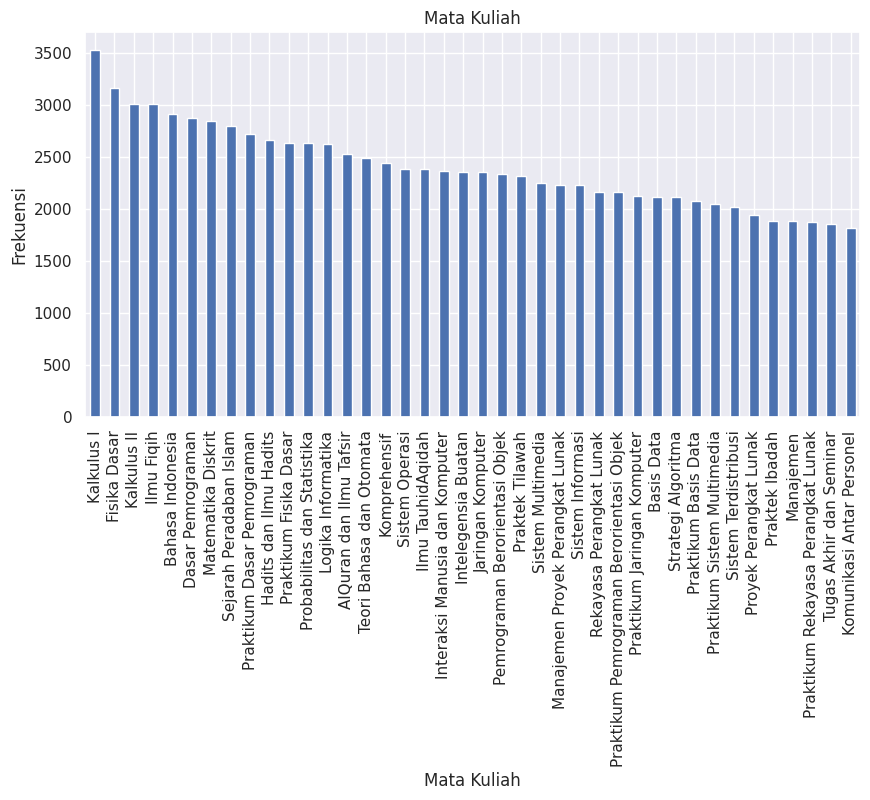

In [ ]:
df.Mata_Kuliah.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Mata Kuliah")
plt.ylabel('Frekuensi')
plt.xlabel('Mata Kuliah')

In [ ]:
import plotly.graph_objects as go  # Tambahkan baris ini
# Menghitung lama studi terlama dan rata-rata lama studi setiap angkatan
lama_studi_terlama = df.groupby('Angkatan')['Lama_Studi_(Tahun)'].max().reset_index()
rata_rata_lama_studi = df.groupby('Angkatan')['Lama_Studi_(Tahun)'].mean().reset_index()

# Menggabungkan dua diagram batang
fig = go.Figure()

fig.add_trace(go.Bar(x=lama_studi_terlama['Angkatan'],
                     y=lama_studi_terlama['Lama_Studi_(Tahun)'],
                     name='Lama Studi Terlama'))

fig.add_trace(go.Bar(x=rata_rata_lama_studi['Angkatan'],
                     y=rata_rata_lama_studi['Lama_Studi_(Tahun)'],
                     name='Rata-rata Lama Studi'))

# Menambahkan label dan judul
fig.update_layout(barmode='group', xaxis_title='Angkatan', yaxis_title='Lama_Studi_(Tahun)',
                  title='Perbandingan Lama Studi Terlama dan Rata-rata Lama Studi Setiap Angkatan')

fig.show()

# Modelling

In [ ]:
print(df.corr(numeric_only=True))

                    Angkatan       SKS  Periode_Semester  Nilai_Numerik  \
Angkatan            1.000000 -0.109826          0.961273      -0.049245   
SKS                -0.109826  1.000000         -0.071220       0.010476   
Periode_Semester    0.961273 -0.071220          1.000000      -0.087116   
Nilai_Numerik      -0.049245  0.010476         -0.087116       1.000000   
Lama_Studi_(Tahun) -0.080862  0.133122          0.196964      -0.139880   

                    Lama_Studi_(Tahun)  
Angkatan                     -0.080862  
SKS                           0.133122  
Periode_Semester              0.196964  
Nilai_Numerik                -0.139880  
Lama_Studi_(Tahun)            1.000000  


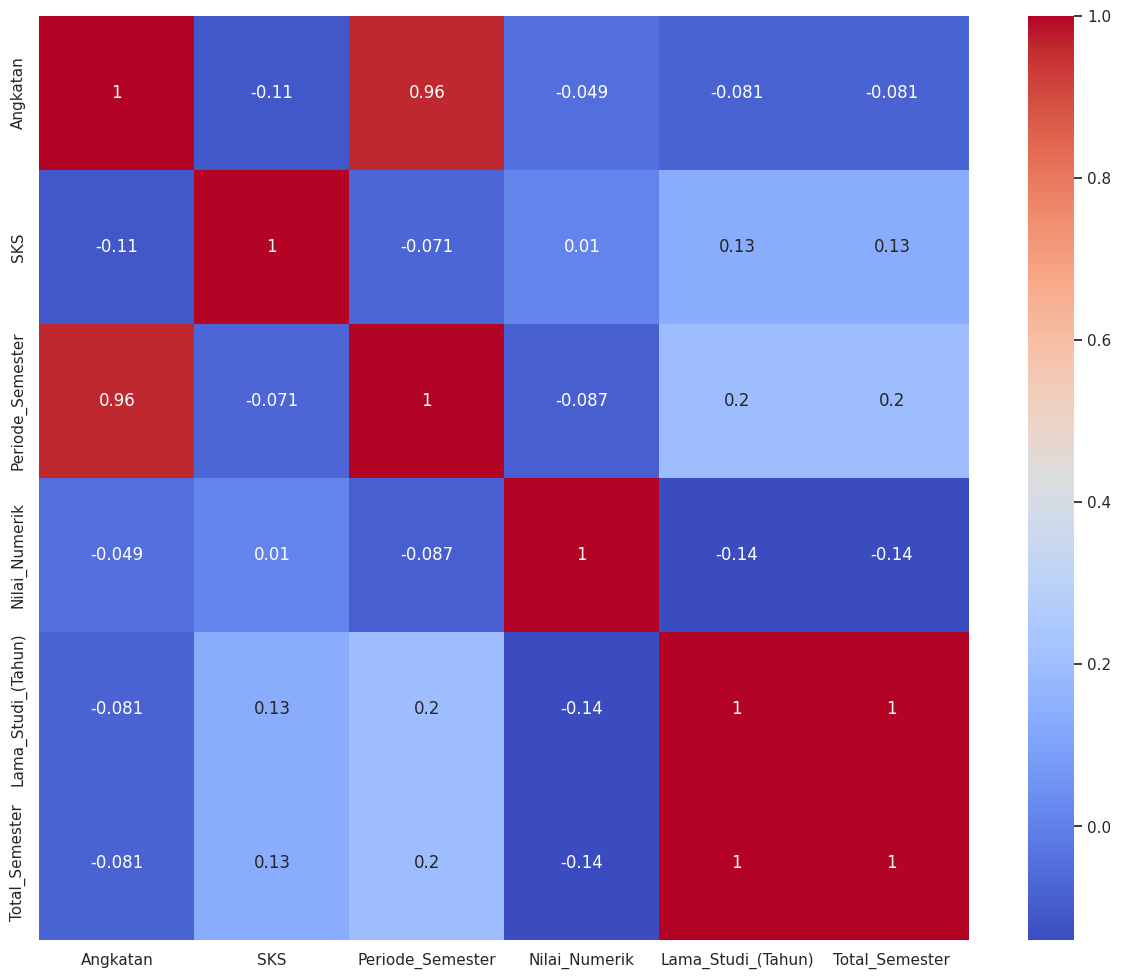

In [ ]:
correlations = df.corr(numeric_only=True,method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


Evaluasi Performa Model:
Mean Squared Error (MSE): 5.207248489897938e-05
R-squared (R2): 0.9999673745433576


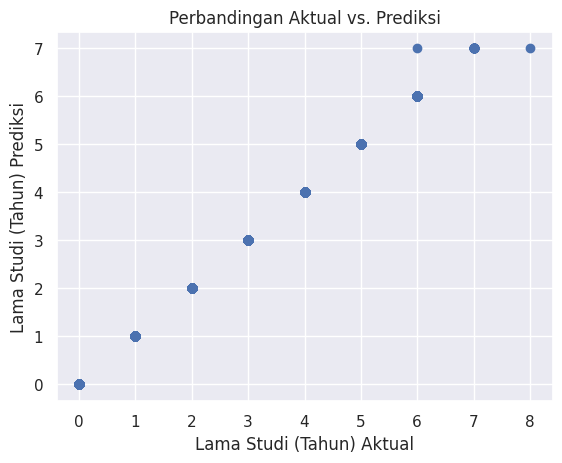

In [ ]:
# Memilih fitur dan target
fitur = df[['Angkatan', 'SKS', 'Periode_Semester']]
target = df['Lama_Studi_(Tahun)']

# Membagi data menjadi data latih dan data uji
fitur_latih, fitur_uji, target_latih, target_uji = train_test_split(fitur, target, test_size=0.2, random_state=42)

# Membuat model Decision Tree Regressor
model = DecisionTreeRegressor()

# Melatih model dengan data latih
model.fit(fitur_latih, target_latih)

# Memprediksi nilai target untuk data uji
prediksi = model.predict(fitur_uji)

# Evaluasi performa model
mse = mean_squared_error(target_uji, prediksi)
r2 = r2_score(target_uji, prediksi)

print("\nEvaluasi Performa Model:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualisasi perbandingan antara nilai aktual dan nilai prediksi
plt.scatter(target_uji, prediksi)
plt.xlabel("Lama Studi (Tahun) Aktual")
plt.ylabel("Lama Studi (Tahun) Prediksi")
plt.title("Perbandingan Aktual vs. Prediksi")
plt.show()

In [ ]:
df['Total_Semester'] = df['Lama_Studi_(Tahun)'] * 2

In [ ]:
# Pilih fitur yang relevan
fitur = df[['SKS', 'Nilai_Numerik', 'Total_Semester']]
fitur.columns = ['SKS', 'Nilai_Numerik', 'Total_Semester']

# Pilih target (yang akan diprediksi)
target = df['Lama_Studi_(Tahun)']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi untuk angkatan 2023
prediksi_angkatan_2023 = model.predict([[6.0, 3.0, 10]])

print("Prediksi Lama Studi Angkatan 2023:", prediksi_angkatan_2023[0])

Prediksi Lama Studi Angkatan 2023: 5.000000000000007


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

